# Trading Strategies

In [35]:
#Mean Reversion
#Simple MA
#Stochastic RSI

#We learn about Stock Analysis Step by step from this Channel:
#https://www.youtube.com/playlist?list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja

# Importing Data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
#Dataset ^GSPC for example!

import yfinance as yf
df = yf.download("^GSPC", start="2021-11-01", end="2022-10-01")

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,4610.620117,4620.339844,4595.060059,4613.669922,4613.669922,3971540000
2021-11-02,4613.339844,4635.149902,4613.339844,4630.649902,4630.649902,3975250000
2021-11-03,4630.649902,4663.459961,4621.189941,4660.569824,4660.569824,4319660000
2021-11-04,4662.930176,4683.000000,4662.589844,4680.060059,4680.060059,4462300000
2021-11-05,4699.259766,4718.500000,4681.319824,4697.529785,4697.529785,4467180000
...,...,...,...,...,...,...
2022-09-26,3682.719971,3715.669922,3644.760010,3655.040039,3655.040039,4886140000
2022-09-27,3686.439941,3717.530029,3623.290039,3647.290039,3647.290039,4577740000
2022-09-28,3651.939941,3736.739990,3640.610107,3719.040039,3719.040039,4684850000


# Mean Reversion

In [38]:
#Simple Moving Average Function
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [39]:
df['SMA']=SMA(df,10)
df['Ratios']=df['Close']/df['SMA']

df

,Open,High,Low,Close,Adj Close,Volume,SMA,Ratios
Date,,,,,,,,
2021-11-01,4610.620117,4620.339844,4595.060059,4613.669922,4613.669922,3971540000,NaN,NaN
2021-11-02,4613.339844,4635.149902,4613.339844,4630.649902,4630.649902,3975250000,NaN,NaN
2021-11-03,4630.649902,4663.459961,4621.189941,4660.569824,4660.569824,4319660000,NaN,NaN
2021-11-04,4662.930176,4683.000000,4662.589844,4680.060059,4680.060059,4462300000,NaN,NaN
2021-11-05,4699.259766,4718.500000,4681.319824,4697.529785,4697.529785,4467180000,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-09-26,3682.719971,3715.669922,3644.760010,3655.040039,3655.040039,4886140000,3830.538989,0.954184
2022-09-27,3686.439941,3717.530029,3623.290039,3647.290039,3647.290039,4577740000,3801.998999,0.959309
2022-09-28,3651.939941,3736.739990,3640.610107,3719.040039,3719.040039,4684850000,3779.302002,0.984055


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratios'>

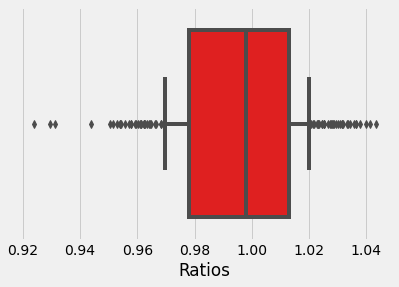

In [42]:
df['Ratios'].describe()

import seaborn as sns

sns.boxplot(df['Ratios'] , color="red" , whis=[15, 85])

In [8]:
percentiles=[15,20,50,80,85]
ratios=df['Ratios'].dropna()
percentiles_values=np.percentile(ratios,percentiles)
percentiles_values

array([0.96934661, 0.97535858, 0.99782887, 1.01657998, 1.02048911])

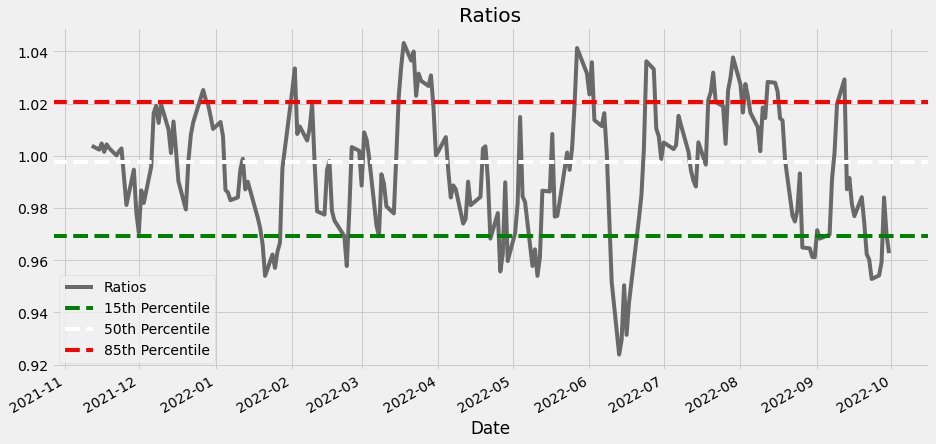

In [9]:
#Plot the Ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(color='dimgray' , legend= True)
plt.axhline(percentiles_values[0],color='green',linestyle='--', label='15th Percentile')
plt.axhline(percentiles_values[2],color='white',linestyle='--', label='50th Percentile')
plt.axhline(percentiles_values[-1],color='red',linestyle='--', label='85th Percentile')
plt.legend()

In [10]:
df["MRPrevoius"]=df.Ratios.shift(-1)

In [11]:
sell = percentiles_values[-1] #Red Line
buy = percentiles_values[0] #Green Line

#above the red line
df ['Positions'] = np.where(((df.Ratios > sell) & (df.MRPrevoius < sell)) , -1, np.nan)

#Saman Suggestion for buying
df ['Positions'] = np.where(((df.Ratios < sell) & (df.MRPrevoius > sell)) , 1, df[ 'Positions' ])

#bellow the green line
df[ 'Positions'] = np.where(((df.Ratios < buy) & (df.MRPrevoius > buy)), 1, df[ 'Positions' ])

df['Positions1'] = df['Positions'].ffill ()

df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

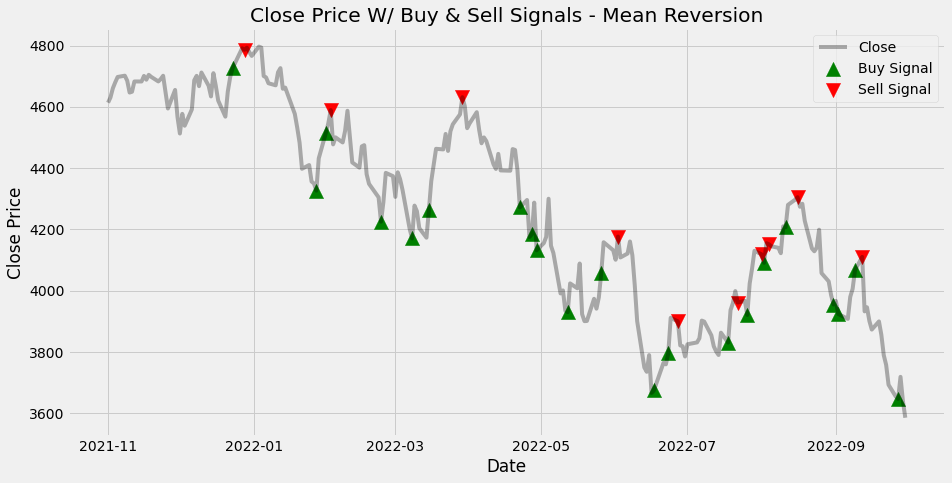

In [12]:
#Visualize the buy and sell signals along witht he close price 
plt.figure(figsize=(14,7))
plt.title('Close Price W/ Buy & Sell Signals - Mean Reversion')
plt.plot(df['Close'], color="black", alpha = 0.3, label= 'Close')
#plt.plot (df['SMA'], alpha = 0.5, label= 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker='^',alpha = 1, s=200)
plt.scatter(df.index, df['Sell'], color ='red', label = 'Sell Signal', marker='v', alpha = 1, s=200)
plt.xlabel ('Date')
plt.ylabel ('Close Price')
plt.legend ()
plt.show()

# Simple Moving Average

In [13]:
df['SMA50']=SMA(df,50)
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,Ratios,MRPrevoius,Positions,Positions1,Buy,Sell,SMA50
Date,,,,,,,,,,,,,,
2021-11-01,4610.620117,4620.339844,4595.060059,4613.669922,4613.669922,3971540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-02,4613.339844,4635.149902,4613.339844,4630.649902,4630.649902,3975250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-03,4630.649902,4663.459961,4621.189941,4660.569824,4660.569824,4319660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-04,4662.930176,4683.000000,4662.589844,4680.060059,4680.060059,4462300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-05,4699.259766,4718.500000,4681.319824,4697.529785,4697.529785,4467180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["Signal"]=np.where(df["SMA"]>df["SMA50"] , 1, 0)
df["SMAposition"]= df["Signal"].diff()
###
df ['SMAposition1'] = np.where(df["SMA"]>df["SMA50"], 1, np.nan)
df[ 'SMAposition1'] = np.where(df["SMA"]<df["SMA50"], -1, df[ 'SMAposition1' ])
df['SMAposition1'] = df['SMAposition1'].ffill ()
###
df["SMAbuy"]=np.where(df.SMAposition==1 , df["Close"], np.NAN)
df["SMAsell"]=np.where(df.SMAposition==-1 , df["Close"], np.NAN)

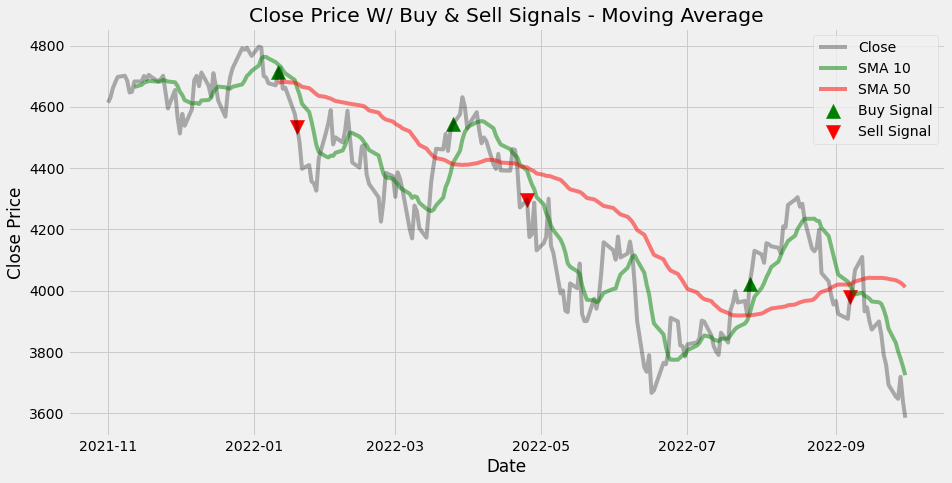

In [15]:
#Visualize the buy and sell signals along witht he close price 
plt.figure(figsize=(14,7))
plt.title('Close Price W/ Buy & Sell Signals - Moving Average')
plt.plot(df['Close'], color="black", alpha = 0.3, label= 'Close')
plt.plot (df['SMA'], color="green", alpha = 0.5, label= 'SMA 10')
plt.plot (df['SMA50'], color="red", alpha = 0.5, label= 'SMA 50')

plt.scatter(df.index, df['SMAbuy'], color = 'green', label = 'Buy Signal', marker='^',alpha = 1 ,s=200)
plt.scatter(df.index, df['SMAsell'], color ='red', label = 'Sell Signal', marker='v', alpha = 1,s=200)
plt.xlabel ('Date')
plt.ylabel ('Close Price')
plt.legend ()
plt.show()

# Stochastic RSI

In [16]:
#exp MA
def EMA(data, period=20, column="Close"):
    return data[column]. ewm(span=period, adjust=False).mean()

In [17]:
def StochRSI (data, period=14, column= "Close"):
    delta = data[column].diff(1)
    delta = delta.dropna ()
    up = delta.copy()
    down = delta.copy()
    up [up<0]=0
    down [down>0]=0
    data["up"] = up
    data["down" ] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs( EMA(data, period, column='down') )
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))
    stockrsi =(RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min() )
    
    return stockrsi
    

In [18]:
df["StochRSI"] = StochRSI(df)

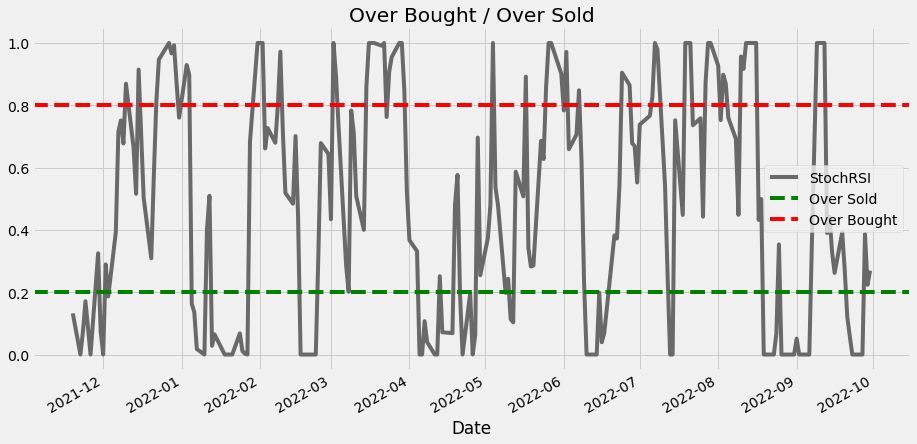

In [19]:
#Plot the Ratios
plt.figure(figsize=(14,7))
plt.title('Over Bought / Over Sold')
df['StochRSI'].plot(color="dimgray",legend= True)
plt.axhline(0.2,color='green', label='Over Sold',linestyle='--')
plt.axhline(0.8,color='red', label='Over Bought',linestyle='--')
plt.legend()

In [20]:
df["RSIPrevoius"]=df.StochRSI.shift(-1)

In [21]:
RSIsell = 0.8 #Red Line
RSIbuy = 0.2 #Green Line

#above the red line
df['RSIPositions'] = np.where(((df.StochRSI > RSIsell) & (df.RSIPrevoius < RSIsell)), -1, np.nan)

#Saman Suggestion for buying
df ['RSIPositions'] = np.where(((df.StochRSI < RSIsell) & (df.RSIPrevoius > RSIsell)) , 1, df[ 'RSIPositions' ])

#below the green line
df['RSIPositions'] = np.where(((df.StochRSI < RSIbuy) & (df.RSIPrevoius > RSIbuy)) , 1, df[ 'RSIPositions' ])

df['RSIPositions1'] = df['RSIPositions'].ffill ()

df['RSIBuy'] = np.where(df.RSIPositions == 1, df['Close'], np.nan)
df['RSISell'] = np.where(df.RSIPositions == -1, df['Close'], np.nan)

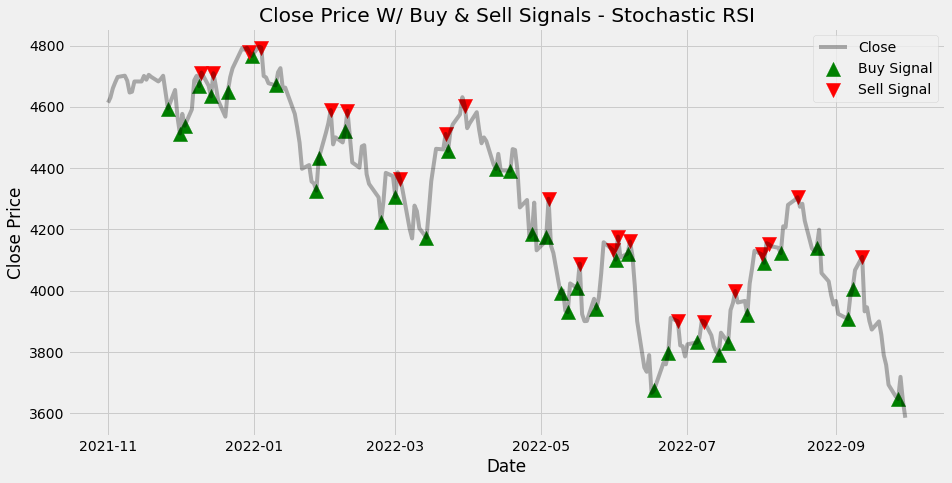

In [22]:
#Visualize the buy and sell signals along witht he close price 
plt.figure(figsize=(14,7))
plt.title('Close Price W/ Buy & Sell Signals - Stochastic RSI')
plt.plot(df['Close'], color="black", alpha = 0.3, label= 'Close')
plt.scatter(df.index, df['RSIBuy'], color = 'green', label = 'Buy Signal', marker='^',alpha = 1, s=200)
plt.scatter(df.index, df['RSISell'], color ='red', label = 'Sell Signal', marker='v', alpha = 1, s=200)
plt.xlabel ('Date')
plt.ylabel ('Close Price')
plt.legend ()
plt.show()

# Growth One Dollar

In [23]:
share=1/df["Close"].iloc[0]
share

0.00021674719191736174

In [24]:

#Buy / Hold
df["Share"]=share
df["One"]=df["Share"]*df["Close"]


In [25]:
#Simple Moving Average
df["OneSMA"]=1
s=1/df["Close"].iloc[0]

for i in range(1,len(df)):
    s=(df["OneSMA"].iloc[(i-1)])/df["Close"].iloc[(i-1)]
    
    if df["SMAposition1"].iloc[i]==1:
        df["OneSMA"].iloc[i]=s*df["Close"].iloc[i]

    else:
        df["OneSMA"].iloc[i]=df["OneSMA"].iloc[(i-1)]
        

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/406703768.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneSMA"].iloc[i]=df["OneSMA"].iloc[(i-1)]
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/406703768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneSMA"].iloc[i]=s*df["Close"].iloc[i]


In [26]:
#Mean Rev
df["OneMR"]=1
s=1/df["Close"].iloc[0]

for i in range(1,len(df)):
    s=(df["OneMR"].iloc[(i-1)])/df["Close"].iloc[(i-1)]

    if df["Positions1"].iloc[i]==1:
        df["OneMR"].iloc[i]=s*df["Close"].iloc[i]
        
    else:
        df["OneMR"].iloc[i]=df["OneMR"].iloc[(i-1)]
        

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/746331628.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneMR"].iloc[i]=df["OneMR"].iloc[(i-1)]
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/746331628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneMR"].iloc[i]=s*df["Close"].iloc[i]


In [27]:
#RSI
df["OneRSI"]=1
s=1/df["Close"].iloc[0]

for i in range(1,len(df)):
    s=(df["OneRSI"].iloc[(i-1)])/df["Close"].iloc[(i-1)]
    
    if df["RSIPositions1"].iloc[i]==1:
        df["OneRSI"].iloc[i]=s*df["Close"].iloc[i]

    else:
        df["OneRSI"].iloc[i]=df["OneRSI"].iloc[(i-1)]
        

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/287787652.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneRSI"].iloc[i]=df["OneRSI"].iloc[(i-1)]
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_79942/287787652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OneRSI"].iloc[i]=s*df["Close"].iloc[i]


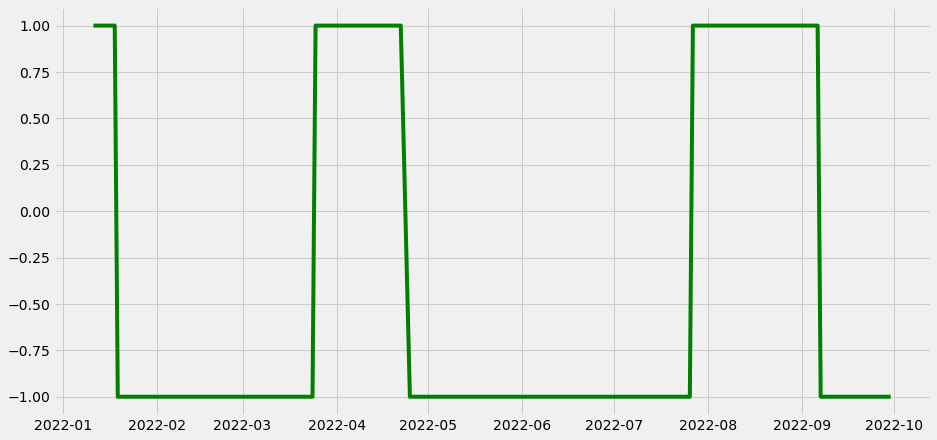

In [32]:
# For example
plt.figure(figsize=(14,7))

plt.plot(df["SMAposition1"],c= 'green')

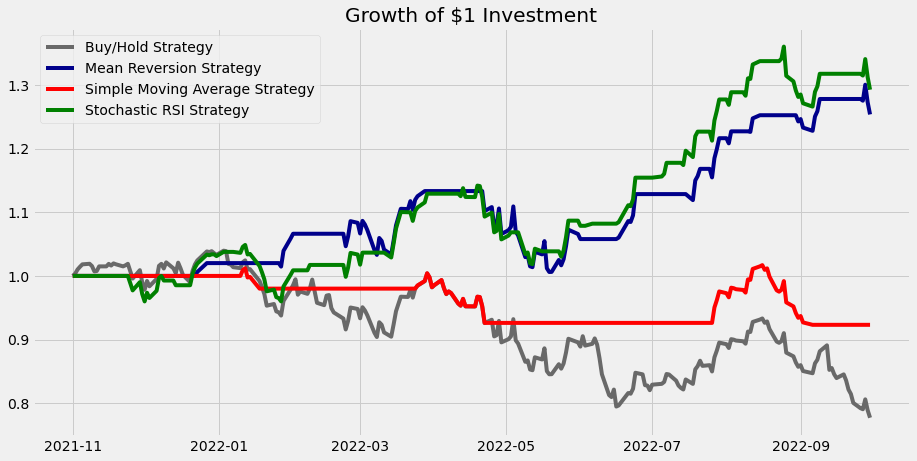

In [28]:
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')

plt.plot(df['One'], c ='dimgray', label ='Buy/Hold Strategy')
plt.plot(df['OneMR'],c= 'darkblue', label ='Mean Reversion Strategy')
plt.plot(df['OneSMA'],c= 'red', label ='Simple Moving Average Strategy')
plt.plot(df['OneRSI'],c= 'green', label ='Stochastic RSI Strategy')

plt.legend()
